In [9]:
import json 
import pandas as pd

df = pd.read_json('new_data.json')
df1 = pd.read_json('mat.json')
df2 = pd.read_json('aiida.json')
df3 = pd.read_json('django.json')
df4 = pd.read_json('gym.json')
df5 = pd.read_json('jinja.json')
df6 = pd.read_json('nni.json')
df7 = pd.read_json('pandas.json')




df = pd.concat([df, df1 ,df2, df3, df4, df5, df6, df7])
df['merged'] = df['merged'].astype(int)

print(df.describe())


       author_followers  requested_reviewers      repo_size  \
count      16900.000000         16900.000000   16900.000000   
mean         214.861302             0.142308  213006.840237   
std          298.753498             0.543441  112927.325478   
min            0.000000             0.000000    7113.000000   
25%           14.000000             0.000000  126159.000000   
50%           52.000000             0.000000  235811.000000   
75%          313.000000             0.000000  240931.000000   
max         1000.000000             7.000000  435615.000000   

       repo_open_issues_count  repo_watchers  comments_count  \
count            16900.000000   16900.000000    16900.000000   
mean              1272.637337   39042.678935       17.219349   
std               1186.628090   22851.237856       23.717168   
min                 44.000000     100.000000        0.000000   
25%                155.000000   16966.000000        1.000000   
50%                977.000000   37142.000000    

In [10]:
df.drop('pr_number', axis=1, inplace=True)

df

,author_followers,updated_at,created_at,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,author_association,comments_count,review_comments_count,mergeable_state,merged,commits,additions,deletions,changed_files,body_length
0,17,2021-12-08 14:00:15+00:00,2021-11-12 07:03:47+00:00,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,11,10,3,388.0
1,34,2019-09-13 15:07:14+00:00,2019-08-16 14:47:51+00:00,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,457,0,2,1212.0
2,35,2019-04-26 22:08:38+00:00,2017-08-01 22:09:39+00:00,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,1,0,1,32.0
3,307,2019-12-17 16:14:41+00:00,2019-11-14 21:58:11+00:00,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,52,53,6,516.0
4,716,2019-04-26 21:29:21+00:00,2017-06-09 23:05:58+00:00,0,240931,977,56494,MEMBER,0,0,unknown,1,1,3,3,1,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2020-09-22 13:41:46+00:00,2020-07-03 19:58:22+00:00,0,314692,3676,37141,CONTRIBUTOR,14,20,dirty,1,33,37,18,8,253.0
1996,32,2021-03-04 21:57:04+00:00,2020-09-11 23:26:44+00:00,0,314692,3676,37141,MEMBER,14,79,dirty,1,56,168,17,6,743.0
1997,326,2020-09-25 18:27:43+00:00,2020-09-19 07:15:22+00:00,1,314692,3676,37141,MEMBER,14,22,dirty,1,11,36,8,6,672.0
1998,0,2020-09-30 07:30:48+00:00,2020-04-24 16:20:26+00:00,1,314692,3676,37141,CONTRIBUTOR,14,39,dirty,1,1,168,3,3,2807.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16900 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   author_followers        16900 non-null  int64              
 1   updated_at              16900 non-null  datetime64[ns, UTC]
 2   created_at              16900 non-null  datetime64[ns, UTC]
 3   requested_reviewers     16900 non-null  int64              
 4   repo_size               16900 non-null  int64              
 5   repo_open_issues_count  16900 non-null  int64              
 6   repo_watchers           16900 non-null  int64              
 7   author_association      16900 non-null  object             
 8   comments_count          16900 non-null  int64              
 9   review_comments_count   16900 non-null  int64              
 10  mergeable_state         16900 non-null  object             
 11  merged                  16900 non-null  in

In [12]:
df = df.dropna()

df['time_diffrence'] = (df['updated_at'] - df['created_at']).dt.total_seconds()/60/60
df.drop('updated_at', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df['time_diffrence'] = df['time_diffrence'].astype(int)
df['body_length'] = df['body_length'].astype(int)
df['merged'] = df['merged'].astype(int)

df

<ipython-input-12-67c4d238793e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diffrence'] = (df['updated_at'] - df['created_at']).dt.total_seconds()/60/60
/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-12-67c4d238793e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,author_followers,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,author_association,comments_count,review_comments_count,mergeable_state,merged,commits,additions,deletions,changed_files,body_length,time_diffrence
0,17,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,11,10,3,388,630
1,34,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,457,0,2,1212,672
2,35,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,1,0,1,32,15191
3,307,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,1,52,53,6,516,786
4,716,0,240931,977,56494,MEMBER,0,0,unknown,1,1,3,3,1,667,16462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,0,314692,3676,37141,CONTRIBUTOR,14,20,dirty,1,33,37,18,8,253,1937
1996,32,0,314692,3676,37141,MEMBER,14,79,dirty,1,56,168,17,6,743,4174
1997,326,1,314692,3676,37141,MEMBER,14,22,dirty,1,11,36,8,6,672,155
1998,0,1,314692,3676,37141,CONTRIBUTOR,14,39,dirty,1,1,168,3,3,2807,3807


In [ ]:
df.describe()

,author_followers,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,comments_count,review_comments_count,merged,commits,additions,deletions,changed_files,body_length,time_diffrence
count,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,15132.000000,1.513200e+04,1.513200e+04,15132.000000,15132.000000,15132.000000
mean,210.209490,0.131047,218552.361684,1383.194555,39209.438871,18.861948,15.062781,0.645586,14.472839,1.189413e+03,6.262700e+02,18.436624,827.475681,6879.230108
std,293.771893,0.516539,114442.816076,1191.318788,22268.339439,24.374209,32.730522,0.478351,162.030372,2.029888e+04,1.610967e+04,239.053411,2345.974685,10860.590111
min,0.000000,0.000000,7113.000000,44.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,0.000000
25%,14.000000,0.000000,126159.000000,155.000000,16966.000000,7.000000,0.000000,0.000000,1.000000,1.600000e+01,1.000000e+00,2.000000,132.000000,192.000000
50%,51.000000,0.000000,235811.000000,977.000000,37142.000000,15.000000,4.000000,1.000000,3.000000,7.100000e+01,9.000000e+00,3.000000,372.000000,1788.500000
75%,303.000000,0.000000,314692.000000,2121.000000,56494.000000,23.000000,16.000000,1.000000,9.000000,2.620000e+02,4.900000e+01,8.000000,963.000000,9729.500000
max,1000.000000,7.000000,435615.000000,3676.000000,69146.000000,717.000000,585.000000,1.000000,10000.000000,1.571238e+06,1.703575e+06,14168.000000,123282.000000,87440.000000


In [13]:
df['author_association'].unique()

one_hot = pd.get_dummies(df['author_association'], prefix='author_association')
one_hot1 = pd.get_dummies(df['mergeable_state'], prefix='mergeable_state')

df = pd.concat([df, one_hot, one_hot1], axis=1)
df

,author_followers,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,author_association,comments_count,review_comments_count,mergeable_state,merged,...,time_diffrence,author_association_COLLABORATOR,author_association_CONTRIBUTOR,author_association_MEMBER,author_association_NONE,mergeable_state_blocked,mergeable_state_clean,mergeable_state_dirty,mergeable_state_unknown,mergeable_state_unstable
0,17,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,...,630,0,1,0,0,0,0,0,1,0
1,34,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,...,672,0,1,0,0,0,0,0,1,0
2,35,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,...,15191,0,1,0,0,0,0,0,1,0
3,307,0,240931,977,56494,CONTRIBUTOR,0,0,unknown,1,...,786,0,1,0,0,0,0,0,1,0
4,716,0,240931,977,56494,MEMBER,0,0,unknown,1,...,16462,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,0,314692,3676,37141,CONTRIBUTOR,14,20,dirty,1,...,1937,0,1,0,0,0,0,1,0,0
1996,32,0,314692,3676,37141,MEMBER,14,79,dirty,1,...,4174,0,0,1,0,0,0,1,0,0
1997,326,1,314692,3676,37141,MEMBER,14,22,dirty,1,...,155,0,0,1,0,0,0,1,0,0
1998,0,1,314692,3676,37141,CONTRIBUTOR,14,39,dirty,1,...,3807,0,1,0,0,0,0,1,0,0


In [14]:
df.drop('author_association', axis=1, inplace=True)
df.drop('mergeable_state', axis=1, inplace=True)
df

,author_followers,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,comments_count,review_comments_count,merged,commits,additions,...,time_diffrence,author_association_COLLABORATOR,author_association_CONTRIBUTOR,author_association_MEMBER,author_association_NONE,mergeable_state_blocked,mergeable_state_clean,mergeable_state_dirty,mergeable_state_unknown,mergeable_state_unstable
0,17,0,240931,977,56494,0,0,1,1,11,...,630,0,1,0,0,0,0,0,1,0
1,34,0,240931,977,56494,0,0,1,1,457,...,672,0,1,0,0,0,0,0,1,0
2,35,0,240931,977,56494,0,0,1,1,1,...,15191,0,1,0,0,0,0,0,1,0
3,307,0,240931,977,56494,0,0,1,1,52,...,786,0,1,0,0,0,0,0,1,0
4,716,0,240931,977,56494,0,0,1,1,3,...,16462,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,0,314692,3676,37141,14,20,1,33,37,...,1937,0,1,0,0,0,0,1,0,0
1996,32,0,314692,3676,37141,14,79,1,56,168,...,4174,0,0,1,0,0,0,1,0,0
1997,326,1,314692,3676,37141,14,22,1,11,36,...,155,0,0,1,0,0,0,1,0,0
1998,0,1,314692,3676,37141,14,39,1,1,168,...,3807,0,1,0,0,0,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15132 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   author_followers                 15132 non-null  int64
 1   requested_reviewers              15132 non-null  int64
 2   repo_size                        15132 non-null  int64
 3   repo_open_issues_count           15132 non-null  int64
 4   repo_watchers                    15132 non-null  int64
 5   comments_count                   15132 non-null  int64
 6   review_comments_count            15132 non-null  int64
 7   merged                           15132 non-null  int64
 8   commits                          15132 non-null  int64
 9   additions                        15132 non-null  int64
 10  deletions                        15132 non-null  int64
 11  changed_files                    15132 non-null  int64
 12  body_length                      15132 non-null

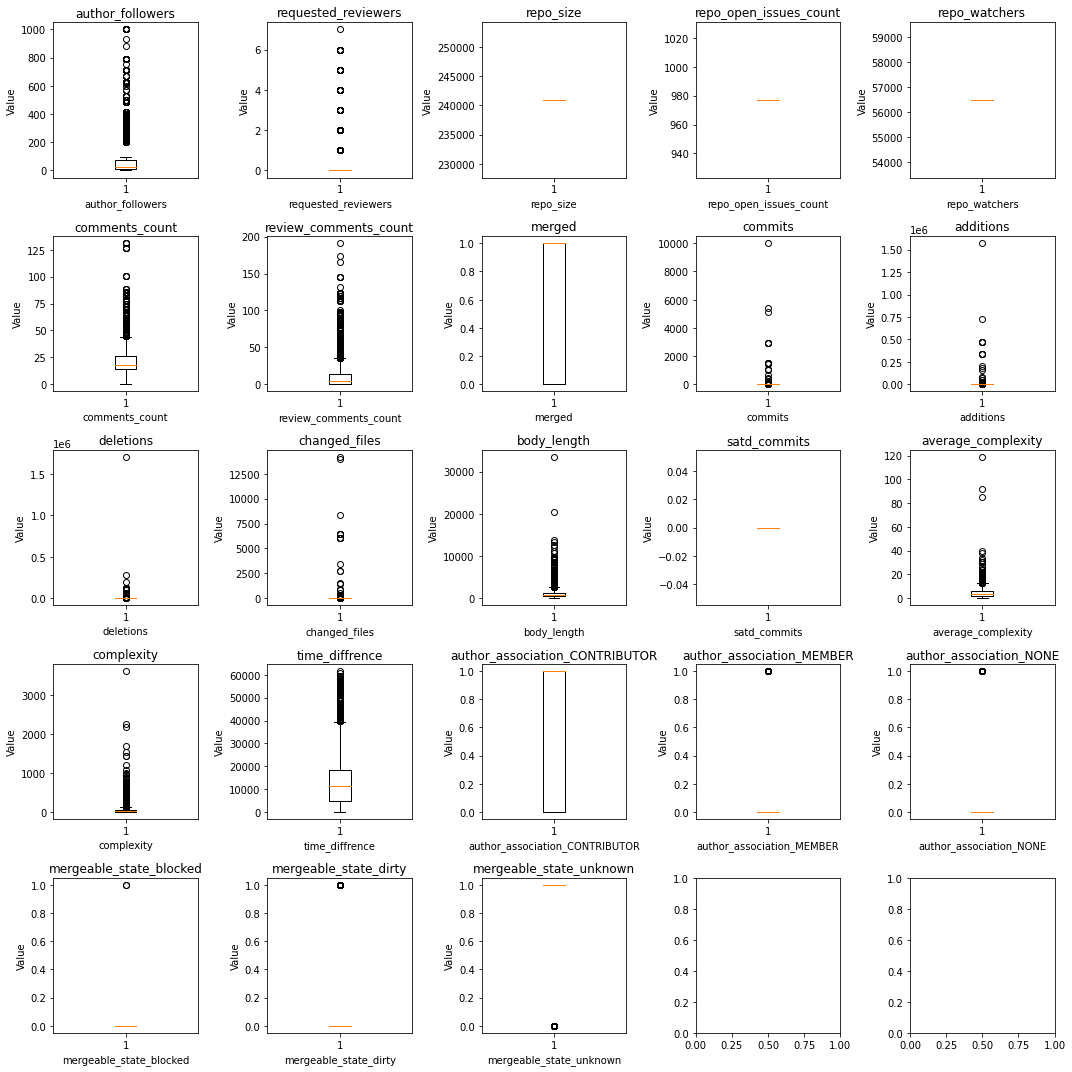

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
axs = axs.ravel()

# loop through each column and plot a boxplot on the corresponding subplot
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

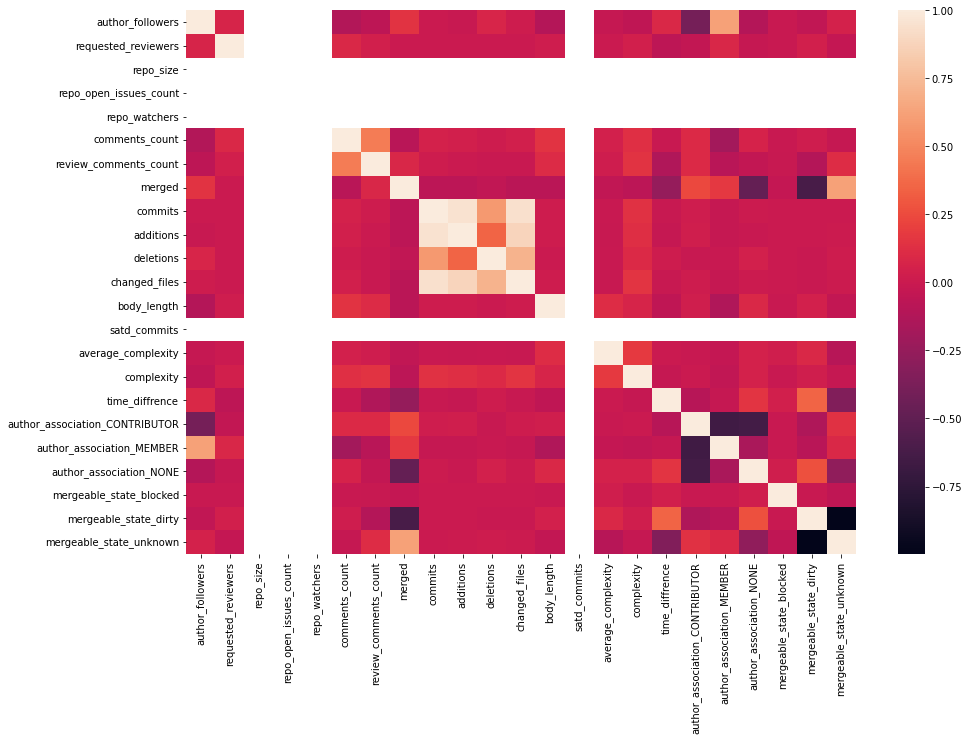

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(1,1,figsize=(15,10))

sns.heatmap(df.corr())

plt.show()

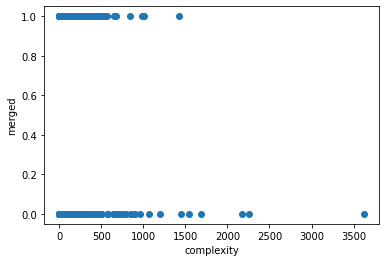

In [ ]:
selected_cols = ['complexity', 'merged']
selected_df = df[selected_cols]

plt.scatter(selected_df['complexity'], selected_df['merged'])

# set labels for the axes
plt.xlabel('complexity')
plt.ylabel('merged')

# show the plot
plt.show()

In [ ]:
!pip install fast_ml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'merged', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_s, x_test_s, x_validate_s = scaler.transform(X_train), scaler.transform(X_test), scaler.transform(X_valid)



In [ ]:
df.drop('merged', axis=1, inplace=True)


<AxesSubplot:title={'center':'Feature Analysis'}, xlabel='Normalized Values'>

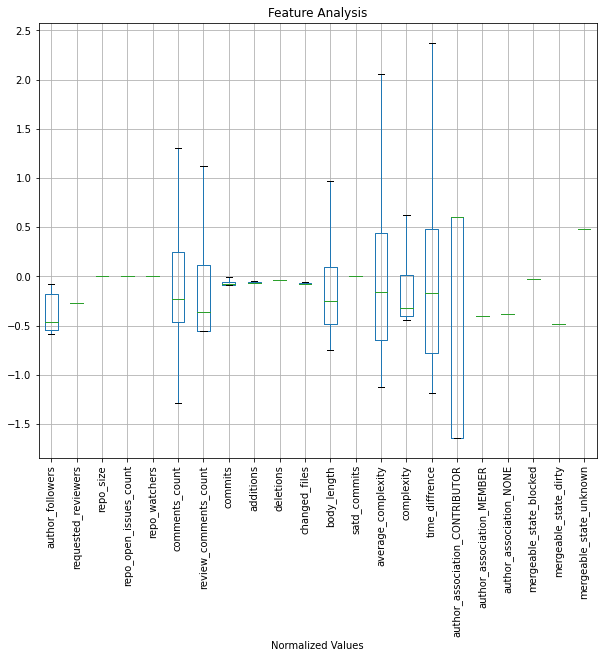

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,8))
axs.set_title('Feature Analysis')
axs.set_xlabel('Normalized Values')
pd.DataFrame(data=X_train_s, columns=df.columns).boxplot(figsize=(10,8), rot=90, ax = axs, showfliers=False)

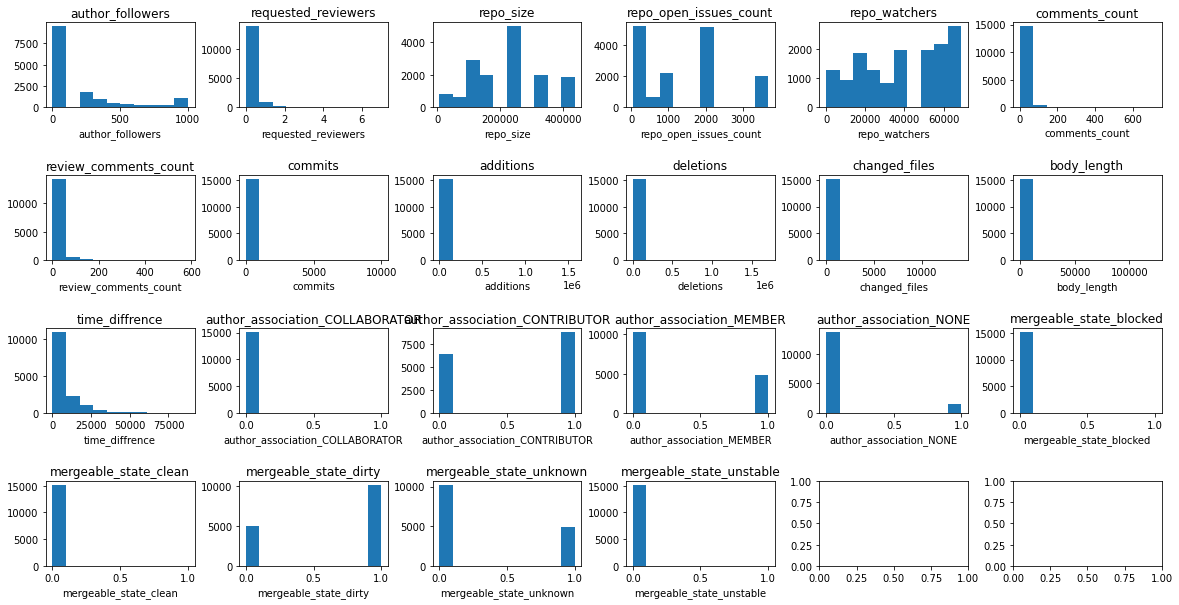

In [ ]:


fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))
axs = axs.ravel()

for i, col in enumerate(df.columns):
    axs[i].hist(df[col], bins=10)
    axs[i].set_title(col)
    axs[i].set_xlabel(col)

plt.subplots_adjust(wspace=0.3, hspace=0.8)

plt.show()

array([[<AxesSubplot:title={'center':'author_followers'}>,
        <AxesSubplot:title={'center':'requested_reviewers'}>,
        <AxesSubplot:title={'center':'repo_size'}>,
        <AxesSubplot:title={'center':'repo_open_issues_count'}>,
        <AxesSubplot:title={'center':'repo_watchers'}>],
       [<AxesSubplot:title={'center':'comments_count'}>,
        <AxesSubplot:title={'center':'review_comments_count'}>,
        <AxesSubplot:title={'center':'commits'}>,
        <AxesSubplot:title={'center':'additions'}>,
        <AxesSubplot:title={'center':'deletions'}>],
       [<AxesSubplot:title={'center':'changed_files'}>,
        <AxesSubplot:title={'center':'body_length'}>,
        <AxesSubplot:title={'center':'time_diffrence'}>,
        <AxesSubplot:title={'center':'author_association_COLLABORATOR'}>,
        <AxesSubplot:title={'center':'author_association_CONTRIBUTOR'}>],
       [<AxesSubplot:title={'center':'author_association_MEMBER'}>,
        <AxesSubplot:title={'center':'author_a

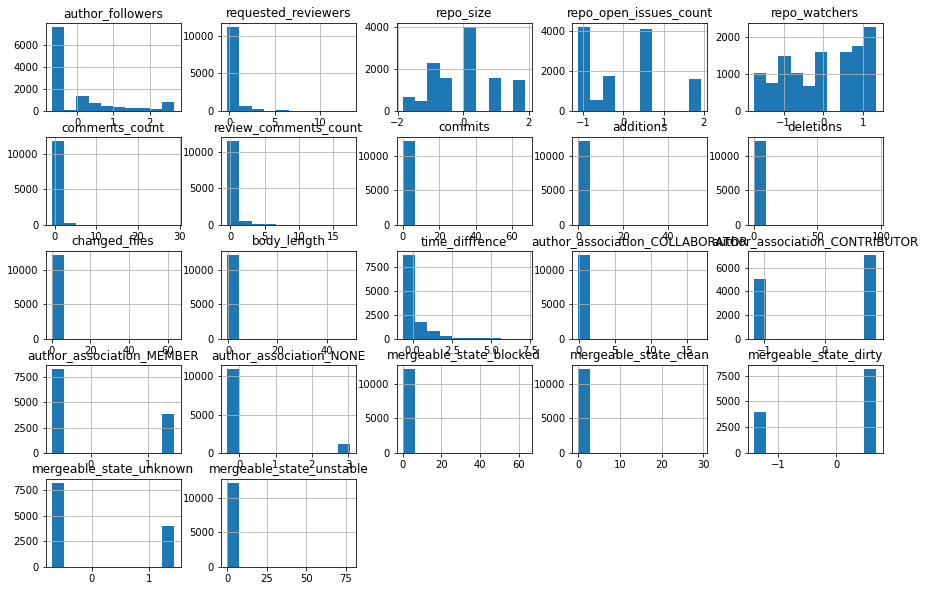

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,10))
pd.DataFrame(data=X_train_s, columns=df.columns).hist(figsize=(15,10), ax = axs)

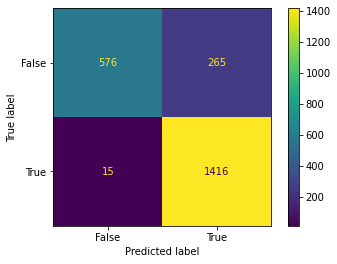

0.8767605633802817


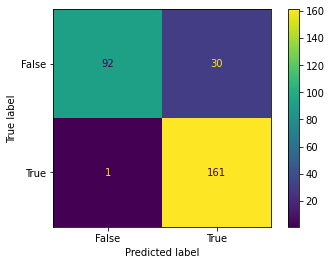

0.8908450704225352


In [ ]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression()
lin_reg.fit(X_train_s, y_train)

y_train_pred = lin_reg.predict(X_train_s)
y_test_pred = lin_reg.predict(x_test_s)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, y_train_pred)

print(Accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(Accuracy)



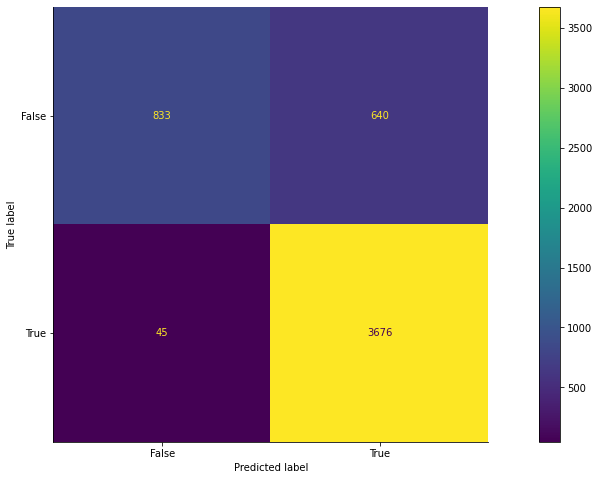

0.8681170581440123


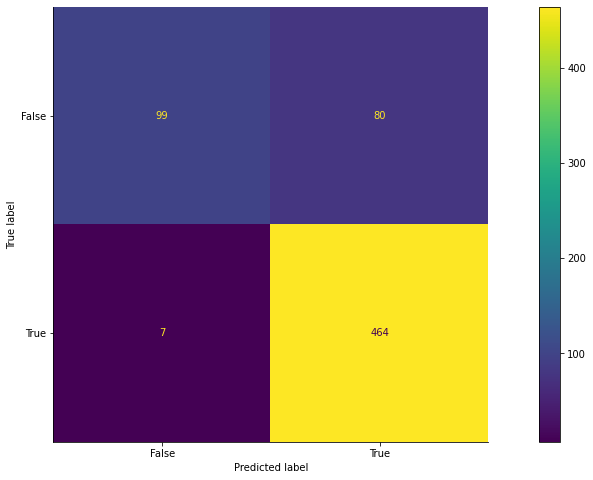

0.8661538461538462


In [ ]:
from sklearn import svm
svm_mod = svm.SVC()
svm_mod.fit(X_train_s, y_train)

y_train_pred1 = svm_mod.predict(X_train_s)
y_test_pred1 = svm_mod.predict(x_test_s)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, y_train_pred1)

print(Accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_test_pred1)

print(Accuracy)

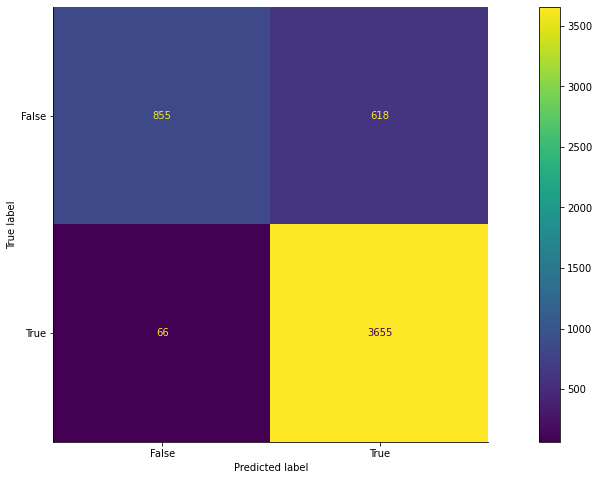

0.8683095879861379


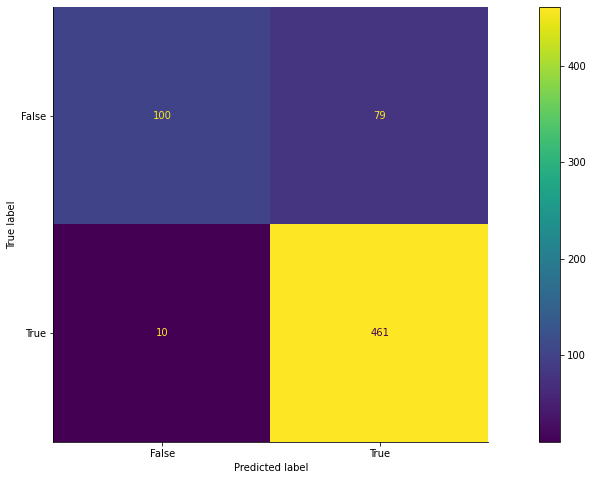

0.8630769230769231


In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=15)
kn.fit(X_train_s, y_train)

y_train_pred3 = kn.predict(X_train_s)
y_test_pred3 = kn.predict(x_test_s)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, y_train_pred3)

print(Accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_test_pred3)

print(Accuracy)

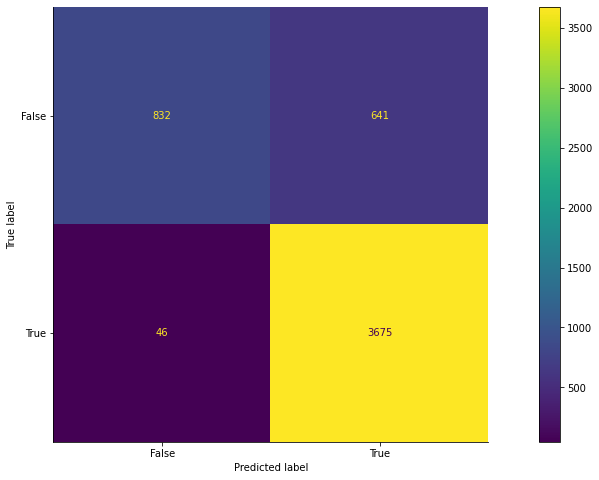

0.8677319984597612


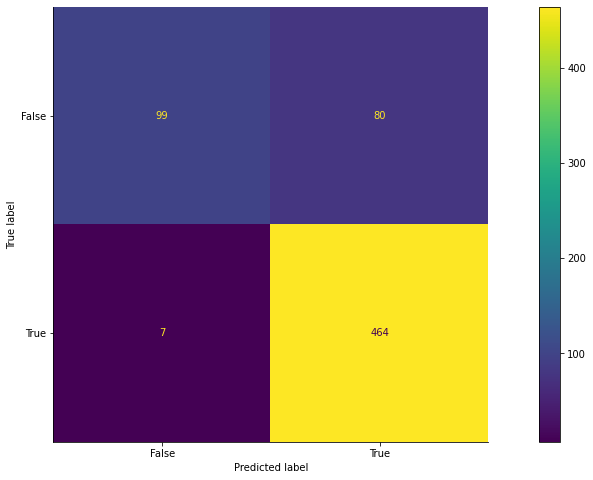

0.8661538461538462


In [ ]:
# ensemble learning (max voting)
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('lr', lin_reg), ('svm', svm_mod), ('kn', kn)], voting='hard')

ensemble_model.fit(X_train_s, y_train)

y_train_pred_ensemble = ensemble_model.predict(X_train_s)
y_test_pred_ensemble = ensemble_model.predict(x_test_s)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_ensemble)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, y_train_pred_ensemble)

print(Accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_ensemble)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_test_pred_ensemble)

print(Accuracy)


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train_s, y_train, epochs=50, validation_data = (x_validate_s, y_valid), callbacks=[my_callback])

Epoch 1/50
71/71 [==============================] - 3s 12ms/step - loss: 0.3959 - accuracy: 0.8477 - precision: 0.8160 - recall: 0.9790 - val_loss: 0.2969 - val_accuracy: 0.9085 - val_precision: 0.8768 - val_recall: 1.0000
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8772 - precision: 0.8424 - recall: 0.9902 - val_loss: 0.2770 - val_accuracy: 0.9120 - val_precision: 0.8810 - val_recall: 1.0000
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8781 - precision: 0.8443 - recall: 0.9888 - val_loss: 0.2760 - val_accuracy: 0.9085 - val_precision: 0.8768 - val_recall: 1.0000
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8807 - precision: 0.8465 - recall: 0.9902 - val_loss: 0.2780 - val_accuracy: 0.8979 - val_precision: 0.8750 - val_recall: 0.9838
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.8847 - precision: 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 20), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 20), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 20), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 20), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

NameError: ignored

71/71 [==============================] - 0s 2ms/step


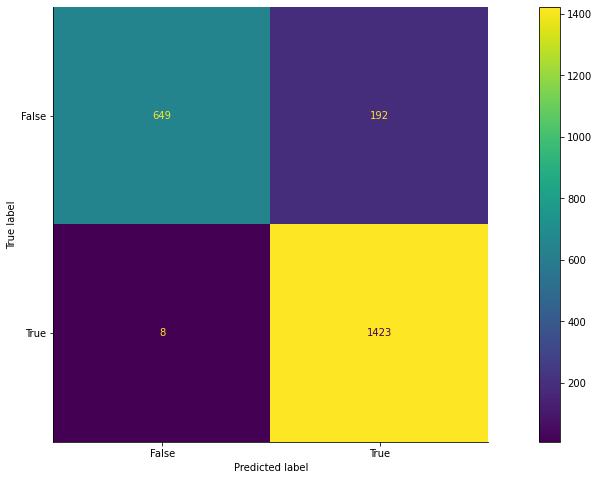

0.9119718309859155
9/9 [==============================] - 0s 2ms/step


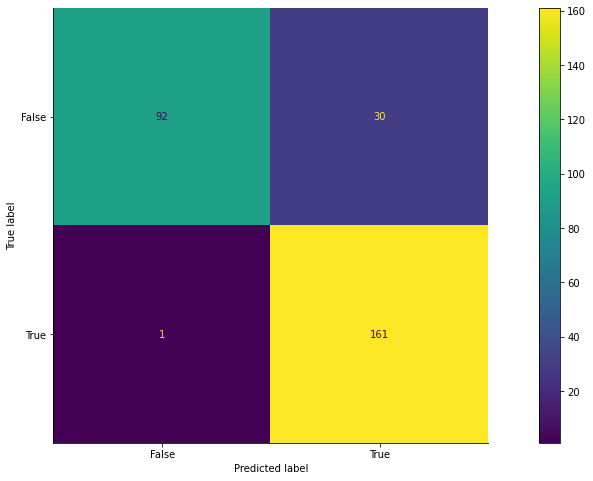

0.8908450704225352


In [ ]:
predictions = model.predict(X_train_s)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_train, prediction_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, prediction_classes)

print(Accuracy)

predictions1 = model.predict(x_test_s)
prediction_classes1 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions1)
]

from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_test, prediction_classes1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, prediction_classes1)

print(Accuracy)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import r2_score
from sklearn import metrics

def objective(trial):
  n_layers = trial.suggest_int('n_layers',1,3)
  my_model = tf.keras.Sequential()
  my_model.add(tf.keras.layers.InputLayer(input_shape = X_train_s.shape[1]))

  for i in range(n_layers):
    num_hidden = trial.suggest_int(f'n_units_l{i}', 4, 128, log=True)
    a_fun = trial.suggest_categorical(f'a_fun_l{i}', ['tanh','sigmoid','relu'])
    my_model.add(tf.keras.layers.Dense(num_hidden, activation=a_fun))

  my_model.add(tf.keras.layers.Dense(1, activation = "linear"))
  loss_fun = trial.suggest_categorical(f'loss_fun', ["binary_crossentropy"])
  optim= trial.suggest_categorical(f'optimizer', ["Adam","RMSprop"])

  my_model.compile(loss = loss_fun, optimizer=optim)

  call_back_patience = trial.suggest_int(f'callback_patience',1,5)
  my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = call_back_patience)

  n_epochs = trial.suggest_int(f'training_epochs',10,100)
  my_model.fit(X_train_s, y_train, epochs = n_epochs, validation_data=(x_validate_s, y_valid), callbacks = [my_callback], verbose=0)

  y_test_pred = my_model.predict(x_test_s).flatten()
  prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_test_pred)
]
  MAE_test = metrics.accuracy_score(y_test,prediction_classes)
  return MAE_test

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 20)

[I 2023-03-09 17:58:42,543] A new study created in memory with name: no-name-5b628265-49ff-4777-bed5-ae63325ccbca


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:58:46,283] Trial 0 finished with value: 0.2753846153846154 and parameters: {'n_layers': 3, 'n_units_l0': 33, 'a_fun_l0': 'sigmoid', 'n_units_l1': 6, 'a_fun_l1': 'sigmoid', 'n_units_l2': 12, 'a_fun_l2': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 55}. Best is trial 0 with value: 0.2753846153846154.


21/21 [==============================] - 0s 1ms/step


[I 2023-03-09 17:58:49,632] Trial 1 finished with value: 0.78 and parameters: {'n_layers': 1, 'n_units_l0': 84, 'a_fun_l0': 'tanh', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 4, 'training_epochs': 79}. Best is trial 1 with value: 0.78.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:58:53,379] Trial 2 finished with value: 0.2753846153846154 and parameters: {'n_layers': 3, 'n_units_l0': 5, 'a_fun_l0': 'relu', 'n_units_l1': 14, 'a_fun_l1': 'sigmoid', 'n_units_l2': 5, 'a_fun_l2': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 2, 'training_epochs': 68}. Best is trial 1 with value: 0.78.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:59:04,801] Trial 3 finished with value: 0.8738461538461538 and parameters: {'n_layers': 3, 'n_units_l0': 11, 'a_fun_l0': 'relu', 'n_units_l1': 41, 'a_fun_l1': 'relu', 'n_units_l2': 5, 'a_fun_l2': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 59}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:59:09,673] Trial 4 finished with value: 0.8323076923076923 and parameters: {'n_layers': 1, 'n_units_l0': 9, 'a_fun_l0': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 12}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:59:16,247] Trial 5 finished with value: 0.2753846153846154 and parameters: {'n_layers': 3, 'n_units_l0': 13, 'a_fun_l0': 'relu', 'n_units_l1': 49, 'a_fun_l1': 'sigmoid', 'n_units_l2': 107, 'a_fun_l2': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 5, 'training_epochs': 72}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:59:33,413] Trial 6 finished with value: 0.8723076923076923 and parameters: {'n_layers': 3, 'n_units_l0': 10, 'a_fun_l0': 'relu', 'n_units_l1': 13, 'a_fun_l1': 'sigmoid', 'n_units_l2': 38, 'a_fun_l2': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 5, 'training_epochs': 87}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 17:59:43,422] Trial 7 finished with value: 0.8707692307692307 and parameters: {'n_layers': 3, 'n_units_l0': 4, 'a_fun_l0': 'relu', 'n_units_l1': 33, 'a_fun_l1': 'relu', 'n_units_l2': 4, 'a_fun_l2': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 23}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:00:04,749] Trial 8 finished with value: 0.8569230769230769 and parameters: {'n_layers': 1, 'n_units_l0': 22, 'a_fun_l0': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 5, 'training_epochs': 42}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:00:10,726] Trial 9 finished with value: 0.84 and parameters: {'n_layers': 1, 'n_units_l0': 11, 'a_fun_l0': 'tanh', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 2, 'training_epochs': 16}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:00:13,514] Trial 10 finished with value: 0.8723076923076923 and parameters: {'n_layers': 2, 'n_units_l0': 43, 'a_fun_l0': 'tanh', 'n_units_l1': 98, 'a_fun_l1': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'RMSprop', 'callback_patience': 1, 'training_epochs': 39}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:00:18,403] Trial 11 finished with value: 0.8692307692307693 and parameters: {'n_layers': 2, 'n_units_l0': 8, 'a_fun_l0': 'relu', 'n_units_l1': 16, 'a_fun_l1': 'tanh', 'loss_fun': 'binary_crossentropy', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 99}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 1ms/step


[I 2023-03-09 18:00:25,491] Trial 12 finished with value: 0.8446153846153847 and parameters: {'n_layers': 2, 'n_units_l0': 17, 'a_fun_l0': 'relu', 'n_units_l1': 8, 'a_fun_l1': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 2, 'training_epochs': 95}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 3ms/step


[I 2023-03-09 18:00:47,322] Trial 13 finished with value: 0.8676923076923077 and parameters: {'n_layers': 3, 'n_units_l0': 7, 'a_fun_l0': 'relu', 'n_units_l1': 27, 'a_fun_l1': 'tanh', 'n_units_l2': 36, 'a_fun_l2': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 5, 'training_epochs': 81}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:00:59,314] Trial 14 finished with value: 0.8676923076923077 and parameters: {'n_layers': 3, 'n_units_l0': 6, 'a_fun_l0': 'relu', 'n_units_l1': 11, 'a_fun_l1': 'sigmoid', 'n_units_l2': 24, 'a_fun_l2': 'tanh', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 59}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:01:03,076] Trial 15 finished with value: 0.8569230769230769 and parameters: {'n_layers': 2, 'n_units_l0': 14, 'a_fun_l0': 'sigmoid', 'n_units_l1': 6, 'a_fun_l1': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 85}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:01:09,373] Trial 16 finished with value: 0.8046153846153846 and parameters: {'n_layers': 3, 'n_units_l0': 4, 'a_fun_l0': 'relu', 'n_units_l1': 4, 'a_fun_l1': 'relu', 'n_units_l2': 11, 'a_fun_l2': 'relu', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 1, 'training_epochs': 49}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:01:15,541] Trial 17 finished with value: 0.8523076923076923 and parameters: {'n_layers': 2, 'n_units_l0': 10, 'a_fun_l0': 'relu', 'n_units_l1': 23, 'a_fun_l1': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 2, 'training_epochs': 30}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:01:18,452] Trial 18 finished with value: 0.8723076923076923 and parameters: {'n_layers': 3, 'n_units_l0': 20, 'a_fun_l0': 'tanh', 'n_units_l1': 46, 'a_fun_l1': 'tanh', 'n_units_l2': 46, 'a_fun_l2': 'tanh', 'loss_fun': 'binary_crossentropy', 'optimizer': 'RMSprop', 'callback_patience': 3, 'training_epochs': 64}. Best is trial 3 with value: 0.8738461538461538.


21/21 [==============================] - 0s 2ms/step


[I 2023-03-09 18:01:21,676] Trial 19 finished with value: 0.2753846153846154 and parameters: {'n_layers': 3, 'n_units_l0': 6, 'a_fun_l0': 'sigmoid', 'n_units_l1': 18, 'a_fun_l1': 'sigmoid', 'n_units_l2': 10, 'a_fun_l2': 'sigmoid', 'loss_fun': 'binary_crossentropy', 'optimizer': 'Adam', 'callback_patience': 4, 'training_epochs': 88}. Best is trial 3 with value: 0.8738461538461538.


In [ ]:
best_hparams = study.best_trial.params
print(best_hparams)

best_hparams_iterator = iter(study.best_trial.params)

n_layers = best_hparams[next(best_hparams_iterator)]

my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1]))

for i in range(n_layers):
  num_hidden = best_hparams[next(best_hparams_iterator)]
  a_fun = best_hparams[next(best_hparams_iterator)]
  my_model.add(tf.keras.layers.Dense(num_hidden, activation = a_fun))

my_model.add(tf.keras.layers.Dense(1, activation = "linear"))

my_model.compile(loss = best_hparams["loss_fun"], optimizer = best_hparams["optimizer"])
my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = best_hparams['callback_patience'])
my_model.fit(X_train_s, y_train, epochs = best_hparams['training_epochs'], validation_data = (x_validate_s, y_valid), callbacks=[my_callback], verbose=0)

y_train_pred_o, y_test_pred_o = my_model.predict(X_train_s).flatten(), my_model.predict(x_test_s).flatten()

# fig, axs = plt.subplots(1,2, figsize=(12,6))

# axs[0].scatter(y_train_pred_o, y_train)
# axs[0].plot([0,1],[0,1], transform=axs[0].transAxes,c='orange')
# axs[0].set_xlabel('predictions')
# axs[0].set_ylabel('realizations')

# axs[1].scatter(y_test_pred_o, y_test)
# axs[1].plot([0,1],[0,1], transform=axs[1].transAxes,c='orange')
# axs[1].set_xlabel('predictions')
# axs[1].set_ylabel('realizations')

# plt.show()

# print(f'Traning MAE: {mean_absolute_error(y_train,y_train_pred_o):.4f}')
# print(f'Test MAE: {mean_absolute_error(y_test,y_test_pred_o):.4f}')
prediction_classes_train = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_train_pred_o)
]

prediction_classes_test = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_test_pred_o)
]

from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_train, prediction_classes_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_train, prediction_classes_train)

print(Accuracy)

confusion_matrix = metrics.confusion_matrix(y_test, prediction_classes_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, prediction_classes_test)

print(Accuracy)

NameError: ignored

In [ ]:
from scipy.stats import mode

# a function for feature analysis
def feature_analysis(X, nn, feature_names):
    # determine first and second partial derivatives
    with tf.GradientTape() as snd:
        snd.watch(X)
        with tf.GradientTape() as fst:
            fst.watch(X)
            # prediction with the neural network, i.e., f(X)
            pred = nn(X)
        # gradient
        g = fst.gradient(pred, X)
    # jacobian which outputs Hessian matrix
    h = snd.batch_jacobian(g, X)

    # first partial derivatives
    g_np = g.numpy()
    # average squard partial derivatives
    g_mag_sq = (g_np**2).mean(axis = 0)
    # square root of average squard partial derivatives
    g_mag = np.sqrt(g_mag_sq)
    # sign of average partial derivatives
    g_dir = np.sign(g_np.mean(axis = 0))

    # normalizing constant
    C_ = np.sum(g_mag)
    # normalized feature importance with sign
    fi = (g_mag * g_dir) / C_

    # get signs of each sample
    fi_signs = np.sign(g_np)
    # the mode is the sign which can be observed most often among all samples, the counts is how often this sign is observed
    fi_modes, fi_counts = mode(fi_signs)
    # dividing the count of the sign which is observed most often by the overall sample size gives us a frequency measure
    # which is closer to one, the higher the conformity of the sign
    fi_conformity = fi_counts / g_np.shape[0] #fi_modes * 

    # in analogy to the calculation above, we do the same thing with the second partial derivatives
    h_np = h.numpy()
    # get the square root of average squared direction of curvature and interactions
    h_mag_sq = (h_np**2).mean(axis = 0)
    h_mag = np.sqrt(h_mag_sq)

    # the the sign of average curvature and interactions
    h_dir = np.sign(h_np.mean(axis = 0))

    # normalize the values on the diagonal line to compare the degree of non-linearity
    C_nonlin = np.sum(h_mag.diagonal())
    nonlinearity = (h_dir.diagonal() * h_mag.diagonal()) / C_nonlin

    # normlize the interactions
    lti = np.tril_indices(h_mag.shape[0], k = -1)
    C_ia = np.sum(h_mag[lti])
    interactions = (h_mag[lti] * h_dir[lti]) / C_ia

    # bring curvature and interaction effects back to matrix format
    snd_degree_summary = np.diag(nonlinearity)
    a, b = lti
    inter_iter = iter(interactions)
    for i, j in zip(a, b):
        snd_degree_summary[i, j] = next(inter_iter)
        snd_degree_summary[j, i] = snd_degree_summary[i, j]

    # get the conformity of second order effects
    snd_signs = np.sign(h_np)
    snd_degree_modes, snd_degreee_counts = mode(snd_signs)
    snd_degree_conformity = snd_degreee_counts / h_np.shape[0] #snd_degree_modes * 

    # finally summarize feature importances and second order effects
    summary = pd.DataFrame(data = snd_degree_summary, index = feature_names, columns = feature_names)
    summary.loc[:, 'feature_importance'] = fi
    # as well as their conformity
    summary_conformity = pd.DataFrame(data = snd_degree_conformity.reshape(h_np.shape[1], h_np.shape[2]), index = feature_names, columns = feature_names)
    summary_conformity.loc[:, 'feature_importance'] = fi_conformity.flatten()

    return summary, summary_conformity

X_train_tensor = tf.Variable(X_train_s)
X_test_tensor = tf.Variable(x_test_s)
sum, sum_c = feature_analysis(X_train_tensor, model, X_train.columns)
sum_test, sum_c_test = feature_analysis(X_test_tensor, model, X_train.columns)

sum


,author_followers,requested_reviewers,repo_size,repo_open_issues_count,repo_watchers,comments_count,review_comments_count,commits,additions,deletions,...,average_complexity,complexity,time_diffrence,author_association_CONTRIBUTOR,author_association_MEMBER,author_association_NONE,mergeable_state_blocked,mergeable_state_dirty,mergeable_state_unknown,feature_importance
author_followers,-0.050280,-0.003912,0.003733,-0.003356,0.002820,0.005473,-0.006323,0.006969,0.012129,0.004846,...,-0.004108,-0.005534,0.004610,-0.002220,0.003126,0.008308,0.001768,0.006709,-0.005192,0.053162
requested_reviewers,-0.003912,-0.021223,0.002250,-0.001901,-0.001889,0.002719,-0.003552,-0.005846,0.007266,-0.003083,...,-0.002457,0.004334,0.003040,-0.001269,0.002191,0.005419,0.001081,-0.004659,0.003358,0.030410
repo_size,0.003733,0.002250,-0.022640,0.001993,-0.002070,-0.003704,-0.004455,-0.003957,-0.008659,-0.003121,...,0.002897,0.004570,-0.002804,0.001541,0.002763,-0.005900,-0.001396,-0.004935,0.003749,-0.040881
repo_open_issues_count,-0.003356,-0.001901,0.001993,-0.013621,0.001182,0.003056,-0.003225,0.004945,0.006015,0.002251,...,0.002455,-0.003082,0.002748,-0.001345,-0.001809,0.004304,0.000977,0.003453,-0.002811,0.027350
repo_watchers,0.002820,-0.001889,-0.002070,0.001182,-0.014233,-0.001907,-0.002561,-0.003799,-0.006432,-0.002462,...,0.002136,0.004036,0.002300,0.000879,0.002020,-0.004830,-0.001092,-0.004239,0.002821,-0.024961
comments_count,0.005473,0.002719,-0.003704,0.003056,-0.001907,-0.047630,0.005611,-0.006237,-0.009916,-0.003891,...,0.003371,0.004141,-0.003882,0.002317,-0.002899,-0.006598,-0.001994,-0.005617,0.004696,-0.050664
review_comments_count,-0.006323,-0.003552,-0.004455,-0.003225,-0.002561,0.005611,-0.056062,0.005781,0.012177,0.004688,...,0.003591,0.005838,0.004276,-0.002284,0.004155,0.008292,0.001957,0.006574,-0.005181,0.057850
commits,0.006969,-0.005846,-0.003957,0.004945,-0.003799,-0.006237,0.005781,-0.127900,-0.016806,-0.006663,...,0.005742,0.009189,-0.008378,0.003148,0.004288,-0.012203,-0.002296,-0.010966,0.008407,-0.060017
additions,0.012129,0.007266,-0.008659,0.006015,-0.006432,-0.009916,0.012177,-0.016806,-0.165780,-0.010278,...,0.008907,0.013292,-0.009951,0.004304,0.007836,-0.018022,-0.004056,-0.015365,0.011994,-0.111069
deletions,0.004846,-0.003083,-0.003121,0.002251,-0.002462,-0.003891,0.004688,-0.006663,-0.010278,-0.032091,...,0.003363,0.005030,-0.004033,0.001530,0.002636,-0.007283,-0.001690,-0.006235,0.005078,-0.047204


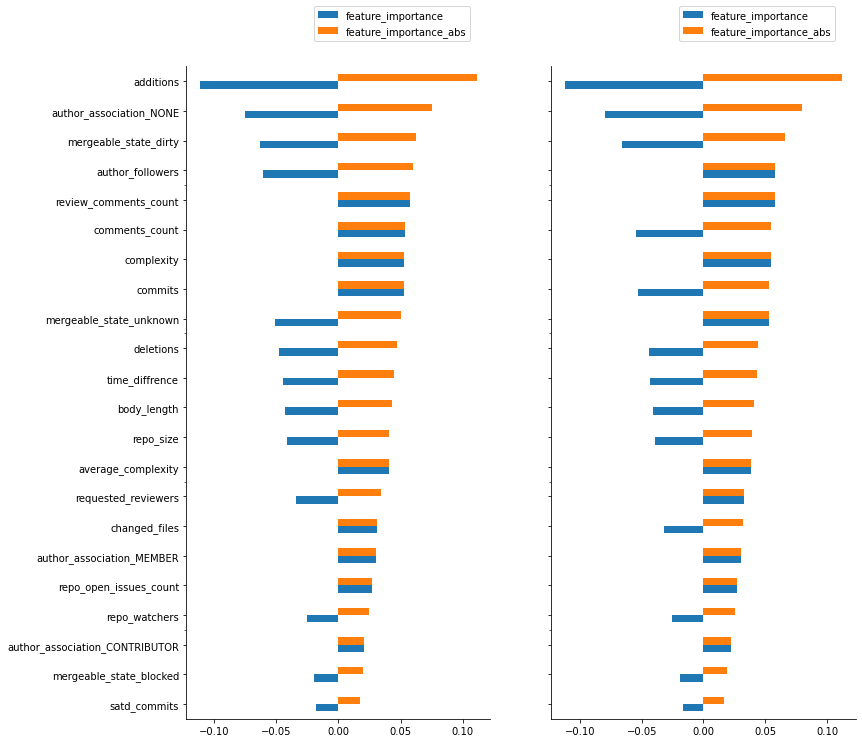

In [ ]:
fig,axs = plt.subplots(1,2, figsize=(12,12), sharey= True)

fi_train = pd.DataFrame(sum["feature_importance"])
fi_train.loc[:, "feature_importance_abs"] = fi_train.feature_importance.abs()
fi_train.sort_values(by="feature_importance_abs", ascending=True, inplace =True)
fi_train.plot.barh(ax=axs[0])

fi_test = pd.DataFrame(sum_test["feature_importance"])
fi_test.loc[:, "feature_importance_abs"] = fi_test.feature_importance.abs()
fi_test.sort_values(by="feature_importance_abs", ascending=True, inplace =True)
fi_test.plot.barh(ax=axs[1])

axs[0].legend(bbox_to_anchor=(0.95,1.1))
axs[1].legend(bbox_to_anchor=(0.95,1.1))

In [ ]:
df = pd.read_json('new_data.json')
df1 = pd.read_json('mat.json')
df2 = pd.read_json('aiida.json')

df.to_csv('data.csv')
df1.to_csv('data.csv')
df2.to_csv('data.csv')

df = pd.concat([df, df1 ,df2])
df.drop('pr_number', axis=1, inplace=True)
df = df.dropna()

df['time_diffrence'] = (df['updated_at'] - df['created_at']).dt.total_seconds()/60/60
df.drop('updated_at', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df.drop('author_association', axis=1, inplace=True)

df['time_diffrence'] = df['time_diffrence'].astype(int)
df['body_length'] = df['body_length'].astype(int)
df['merged'] = df['merged'].astype(int)

one_hot1 = pd.get_dummies(df['mergeable_state'], prefix='mergeable_state')

df = pd.concat([df, one_hot1], axis=1)

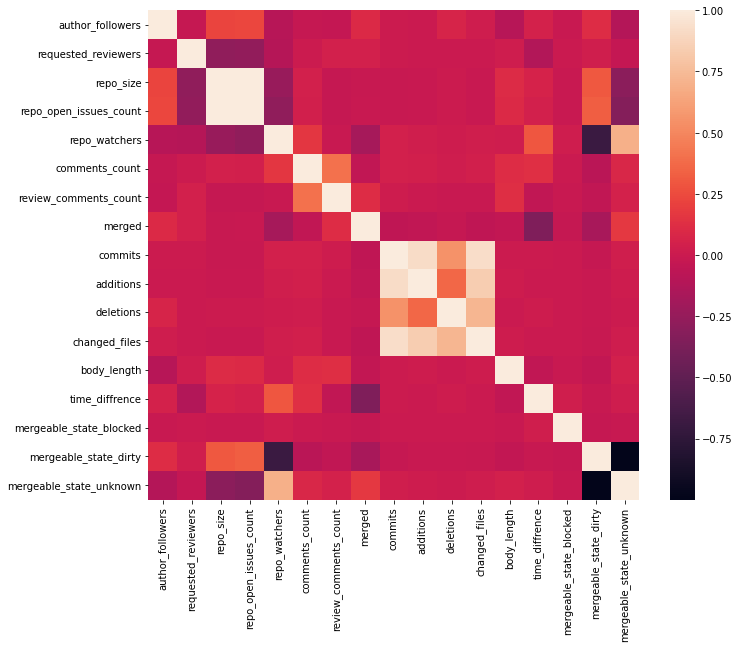

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())

plt.show()

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train_s, y_train, epochs=50, validation_data = (x_validate_s, y_valid), callbacks=[my_callback])

Epoch 1/50
119/119 [==============================] - 2s 6ms/step - loss: 0.4511 - accuracy: 0.8147 - precision: 0.8054 - recall: 0.9639 - val_loss: 0.4118 - val_accuracy: 0.8562 - val_precision: 0.8619 - val_recall: 0.9455
Epoch 2/50
119/119 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8456 - precision: 0.8343 - recall: 0.9682 - val_loss: 0.3740 - val_accuracy: 0.8668 - val_precision: 0.8560 - val_recall: 0.9727
Epoch 3/50
119/119 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8496 - precision: 0.8367 - recall: 0.9712 - val_loss: 0.3885 - val_accuracy: 0.8541 - val_precision: 0.8556 - val_recall: 0.9515
Epoch 4/50
119/119 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8536 - precision: 0.8406 - recall: 0.9716 - val_loss: 0.3845 - val_accuracy: 0.8584 - val_precision: 0.8564 - val_recall: 0.9576
Epoch 5/50
119/119 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8525 - pr

In [ ]:
predictions = model.predict(x_test_s)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_test, prediction_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not merged', 'merged'])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, prediction_classes)

print(Accuracy)

NameError: ignored